## Problem statement
ONGCF is an oil and natural gas organization. It has data available for price at a weekly level. It wants to predict the price for crude oil for the next 16 months, starting from 1st Jan 2019 to April 2020. Forecast the prices based upon the best model as per your choice. Check for outliers and missing values.

Train.csv has training data available and sample submission.csv describes the file format to be submitted.

MAPE is the evaluation metric that will be used in this case to evaluate your output. You are expected to make the submission within 180 minutes of your examination. Submissions post that won't be accepted. A maximum of 20 submissions can be made.

Questions: 1. Are there any outliers or missing values? If yes, treat them with appropriate measures. Describe the steps taken and why was it taken. 2. What type of time series is present? Whether it's additive or multiplicative or none? Explain. 3. Decompose the time series components without using any external package(using ground mathematical formula for this) 4. Forecast the values for time indexes given in the test.csv file and upload the output as a CSV file in the Kaggle competition platform itself. 5. Apart from MAPE, what other metrics could have been used to calculate the forecasting error? Write a function to calculate MAPE which takes in predicted and original values as an array, and returns MAPE as the final output. Once done, put in all the output files and notebook(R/Python) as a zip file in the following format: EmpoyeeID_Name_Forecasting_L0.zip and send out in mail to Anindita, Soumya, Ashmita Sengupta and Shubham

## Dataset Description
The data contains petrol prices(Petrol (USD)) and Date column in train_data.csv. The test data has the dates for which the predictions are to be made(column names Date and Prediction), corresponding to which Prediction is blank. You are supposed to make the prediction and submit the file in that form.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("petrol price forcasting.csv")

In [3]:
data.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [4]:
data.tail()

,Date,Petrol (USD)
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61
812,12/31/2018,120.18


In [5]:
data.shape

(813, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [7]:
# check null value
data.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [8]:
##fill the null value with median
data["Petrol (USD)"] = data["Petrol (USD)"].fillna(np.nanmedian(data["Petrol (USD)"]))

In [9]:
# check duplicet value
data.duplicated().sum()

0

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Check the datatype of the index and convert it to datetime if necessary.

Set the datetime column as the index of the dataframe.

In [10]:
# after getting data convert date column in date time
data["Date"] = pd.to_datetime(data["Date"])

In [11]:
data

,Date,Petrol (USD)
0,2003-06-09,74.59
1,2003-06-16,74.47
2,2003-06-23,74.42
3,2003-06-30,74.35
4,2003-07-07,74.28
...,...,...
808,2018-12-03,124.30
809,2018-12-10,122.37
810,2018-12-17,121.02
811,2018-12-24,120.61


## why we are converting date column as a index column
i can easily retrive the data
visulization is also simple
those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [12]:
# <!-- set date as index -->
data = data.set_index("Date")

In [13]:
# get statistical summery
data.describe()

,Petrol (USD)
count,813.000000
mean,110.335621
std,19.217750
min,74.210000
25%,94.620000
50%,112.420000
75%,128.550000
max,189.510000


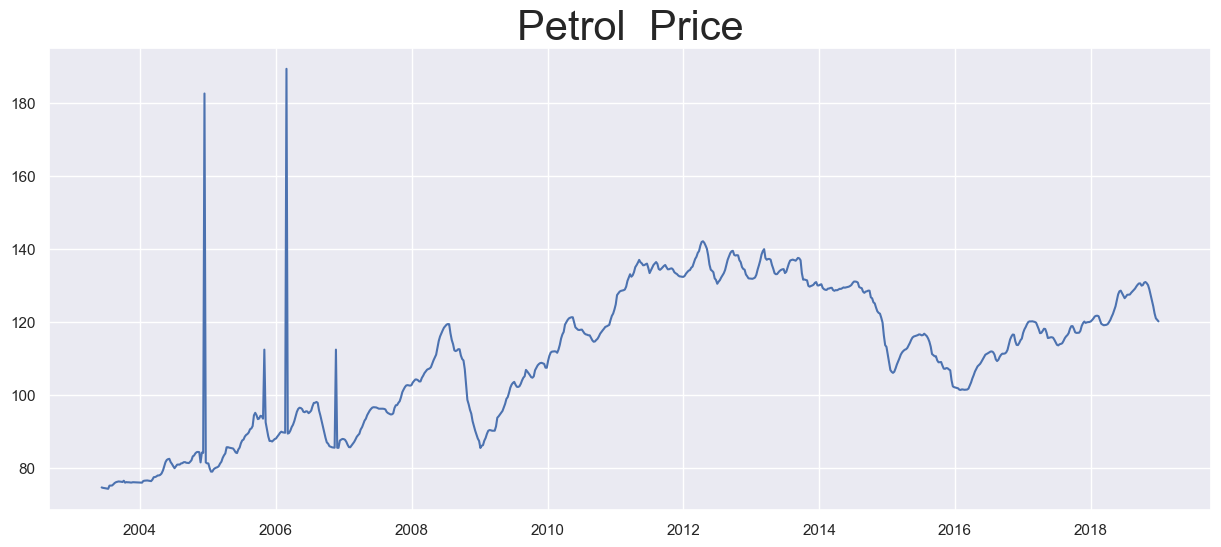

In [14]:
# now we have to do EDA to understand the data
plt.title("Petrol  Price",fontsize=30)
plt.plot(data)

<Axes: title={'center': 'Petrol  Price Distribution'}, ylabel='Density'>

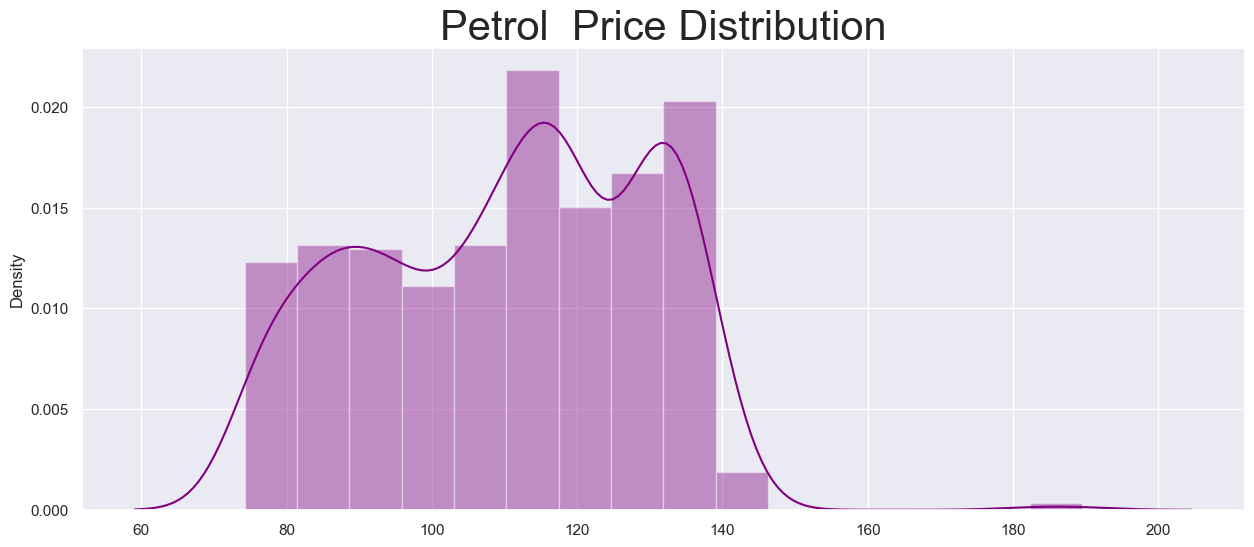

In [15]:
# now we have to do EDA to understand the data
plt.title("Petrol  Price Distribution",fontsize=30)
sns.distplot(data,color="purple")

<Axes: title={'center': 'Petrol  Price'}, xlabel='Petrol (USD)'>

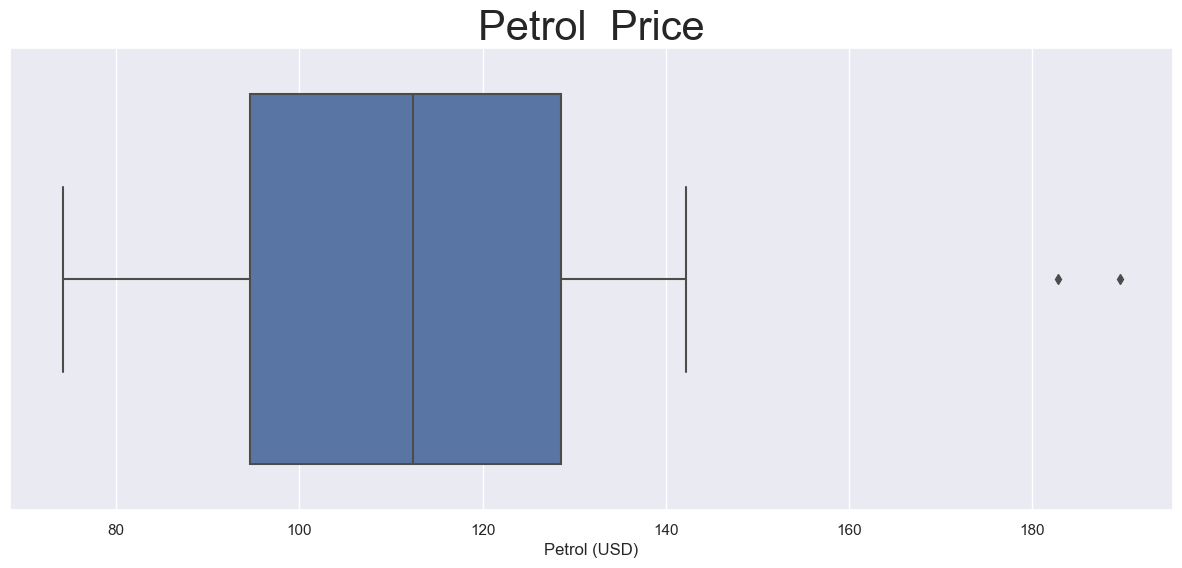

In [16]:
# checking Outlayer with Box Plot
plt.title("Petrol  Price",fontsize=30)
sns.boxplot(data["Petrol (USD)"])

In [17]:
# calculate moving avarage
moving_mean = data["Petrol (USD)"].rolling(55).mean()
print(moving_mean)

Date
2003-06-09           NaN
2003-06-16           NaN
2003-06-23           NaN
2003-06-30           NaN
2003-07-07           NaN
                 ...    
2018-12-03    124.763455
2018-12-10    124.812545
2018-12-17    124.828727
2018-12-24    124.844364
2018-12-31    124.849273
Name: Petrol (USD), Length: 813, dtype: float64


In [18]:
# calculate moving std
moving_std = data["Petrol (USD)"].rolling(55).std()
print(moving_std)

Date
2003-06-09         NaN
2003-06-16         NaN
2003-06-23         NaN
2003-06-30         NaN
2003-07-07         NaN
                ...   
2018-12-03    4.257958
2018-12-10    4.213479
2018-12-17    4.196839
2018-12-24    4.179131
2018-12-31    4.173383
Name: Petrol (USD), Length: 813, dtype: float64


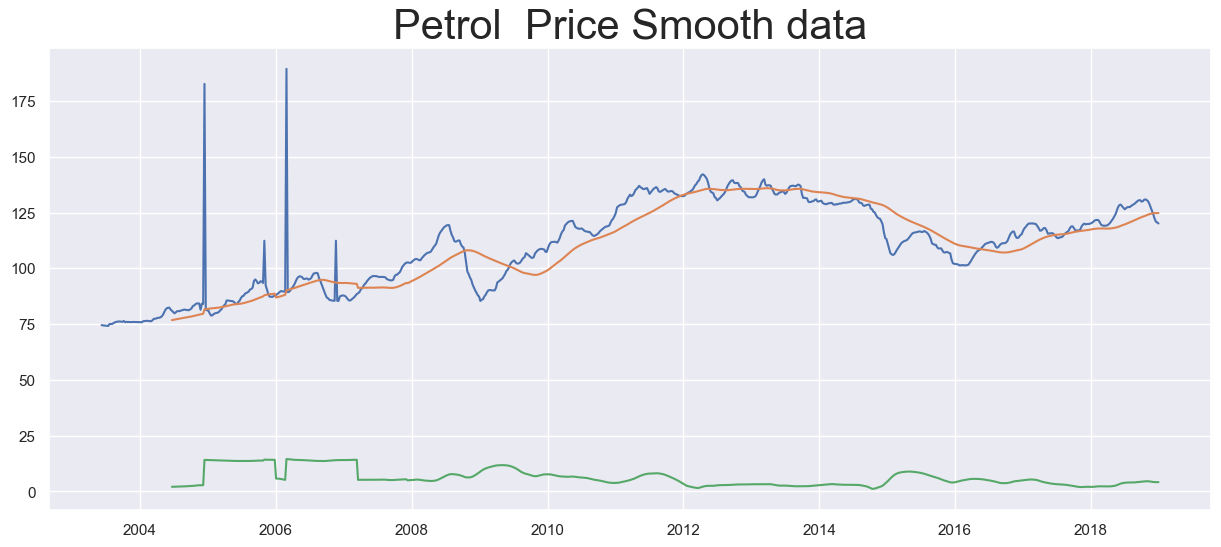

In [19]:
# now plot and check Smoothness of data
plt.title("Petrol  Price Smooth data",fontsize=30)
plt.plot(data["Petrol (USD)"])
plt.plot(moving_mean)
plt.plot(moving_std)

In [20]:
# testing the data is stationary or non stationary
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data["Petrol (USD)"])
adf

(-2.057953882614254,
 0.26175400772827506,
 6,
 806,
 {'1%': -3.438489266223099,
  '5%': -2.8651325741144573,
  '10%': -2.5686830088234025},
 5070.491672377301)

In [21]:
pd.Series(adf[:4],index=["test stats","p-value","lag","data point"])

test stats     -2.057954
p-value         0.261754
lag             6.000000
data point    806.000000
dtype: float64

In [22]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(55).mean() # rolling mean
    rolstd = timeseries.rolling(55).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

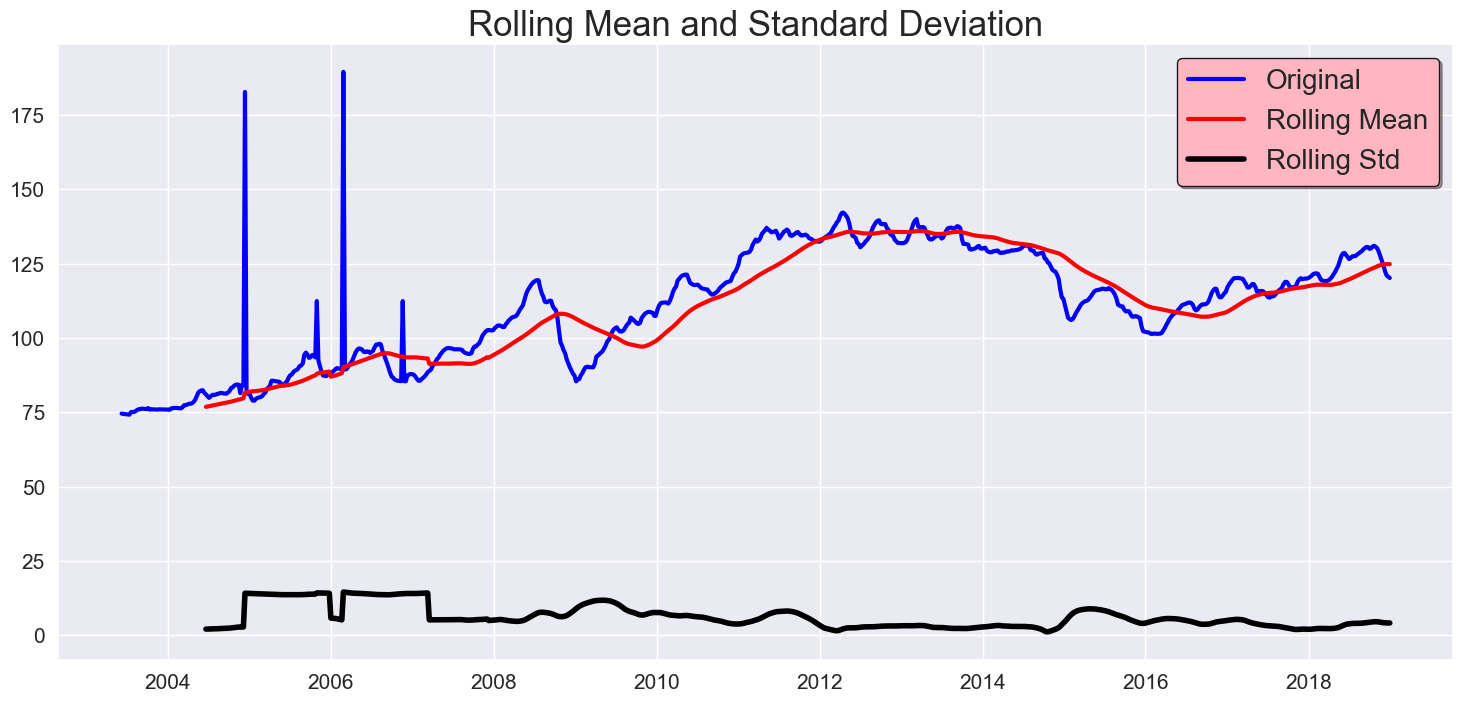

Results of dickey fuller test
Test Statistics                 -2.057954
p-value                          0.261754
No. of lags used                 6.000000
Number of observations used    806.000000
critical value (1%)             -3.438489
critical value (5%)             -2.865133
critical value (10%)            -2.568683
dtype: float64


In [23]:
test_stationarity(data)

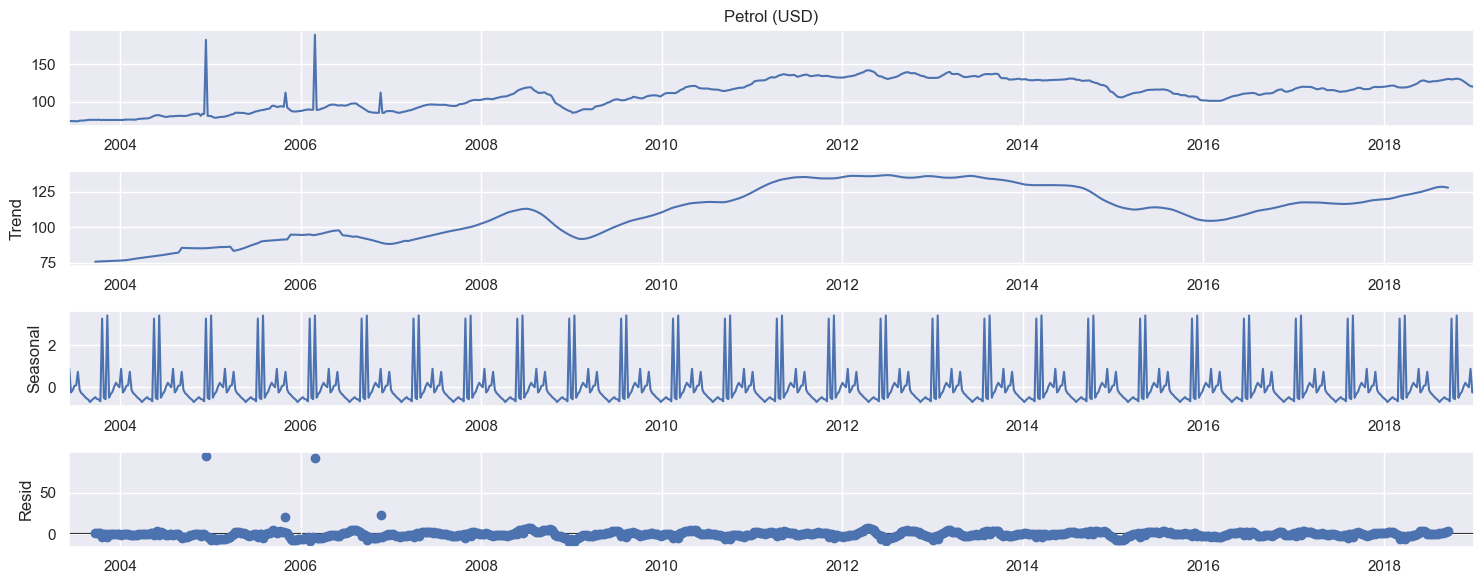

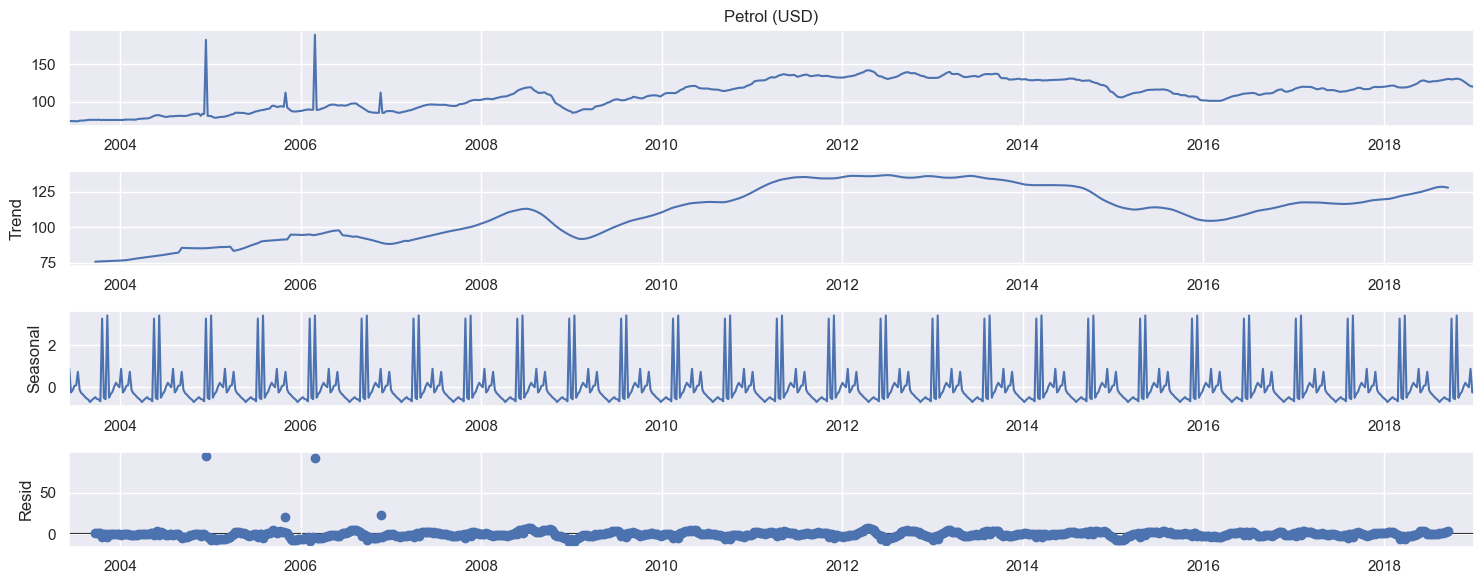

In [24]:
# See Components of data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Petrol (USD)"],period=30)
result.plot()

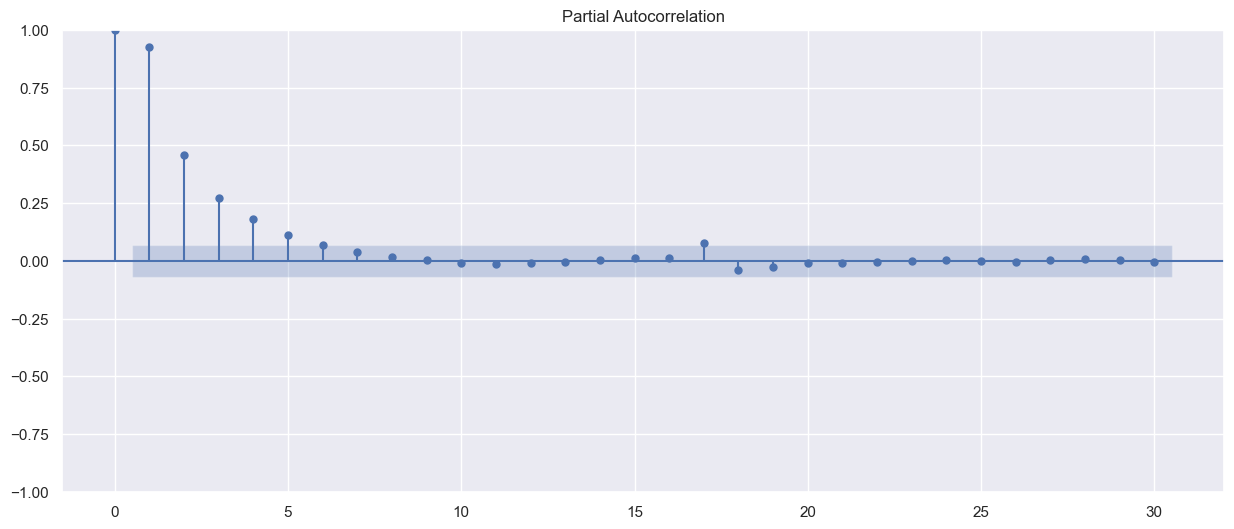

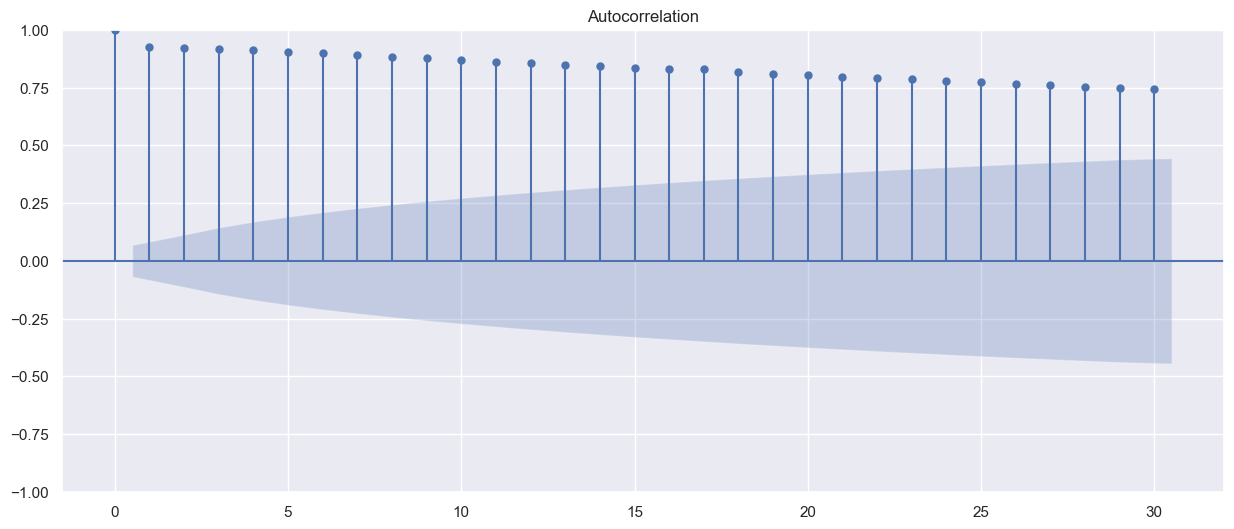

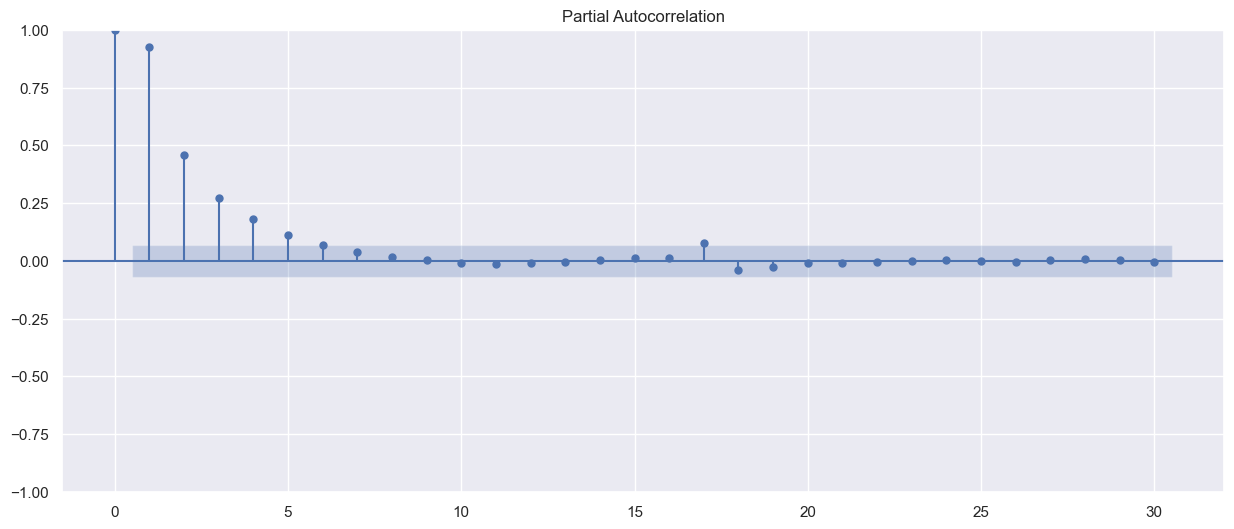

In [25]:
# plot he graph of ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data["Petrol (USD)"])
plot_pacf(data["Petrol (USD)"])

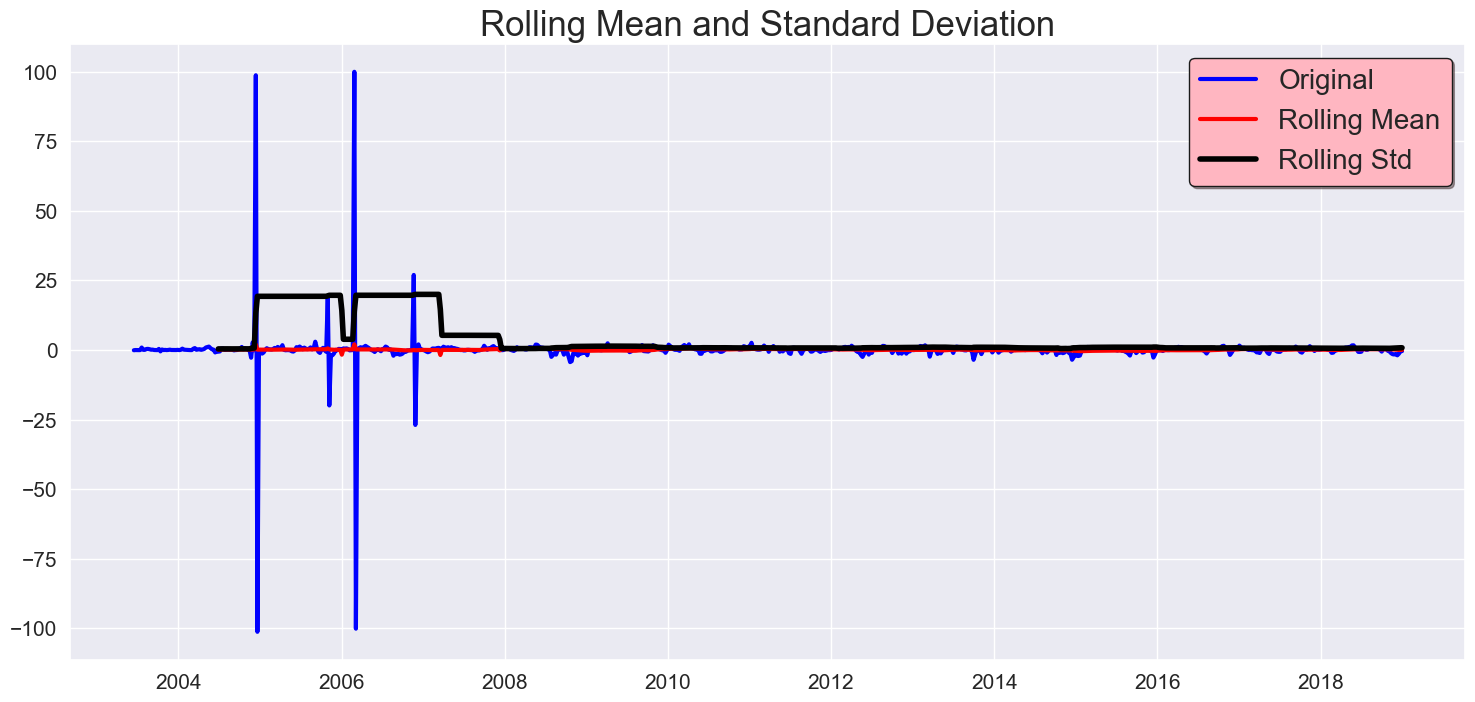

Results of dickey fuller test
Test Statistics               -1.676234e+01
p-value                        1.307044e-29
No. of lags used               5.000000e+00
Number of observations used    8.060000e+02
critical value (1%)           -3.438489e+00
critical value (5%)           -2.865133e+00
critical value (10%)          -2.568683e+00
dtype: float64


In [26]:
# convert data into the stationary time series
# method1
test_stationarity(data["Petrol (USD)"].diff().dropna())

In [27]:
price = data["Petrol (USD)"]

In [28]:
price

Date
2003-06-09     74.59
2003-06-16     74.47
2003-06-23     74.42
2003-06-30     74.35
2003-07-07     74.28
               ...  
2018-12-03    124.30
2018-12-10    122.37
2018-12-17    121.02
2018-12-24    120.61
2018-12-31    120.18
Name: Petrol (USD), Length: 813, dtype: float64

In [29]:
# Split Train And Test Data
train_data = price[:-60]
test_data = price[-60:]

In [30]:
print(train_data.shape)
print(test_data.shape)

(753,)
(60,)


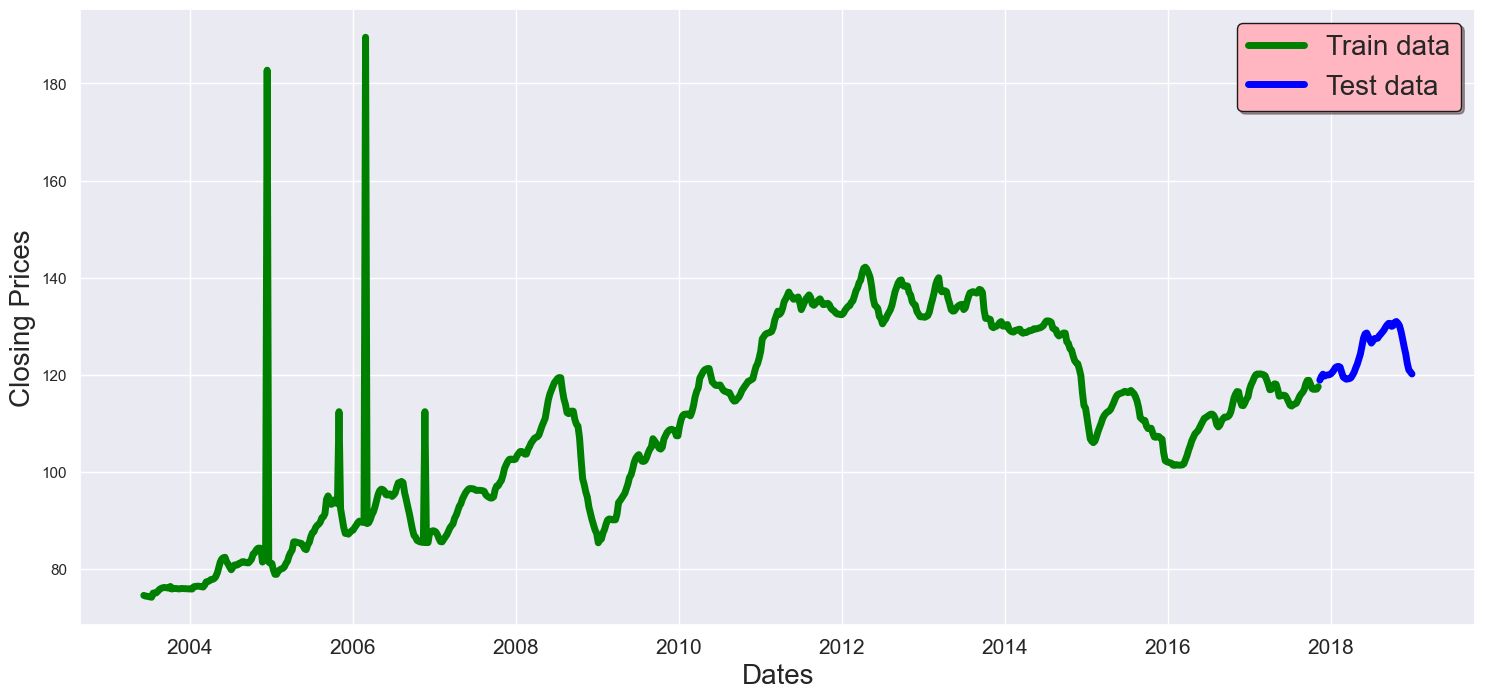

In [31]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
history  = [x for x in price]

In [35]:
# Creat the function to train model
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [36]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [37]:
# # evaluate parameters
# p_values = range(0, 3)
# d_values = range(0, 3)
# q_values = range(0, 3)
# evaluate_models(train_data, test_data, p_values, d_values, q_values)

In [38]:
# ARIMA(0, 2, 0) RMSE=0.443

SyntaxError: invalid syntax (3580630362.py, line 1)

In [39]:
# Traning On ARIMA Algoridham
history  = [x for x in train_data]
predictions = []
for i in range(len(test_data)):
    model = ARIMA(history,order=(0, 2, 0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data[i])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 0.44308388972441964


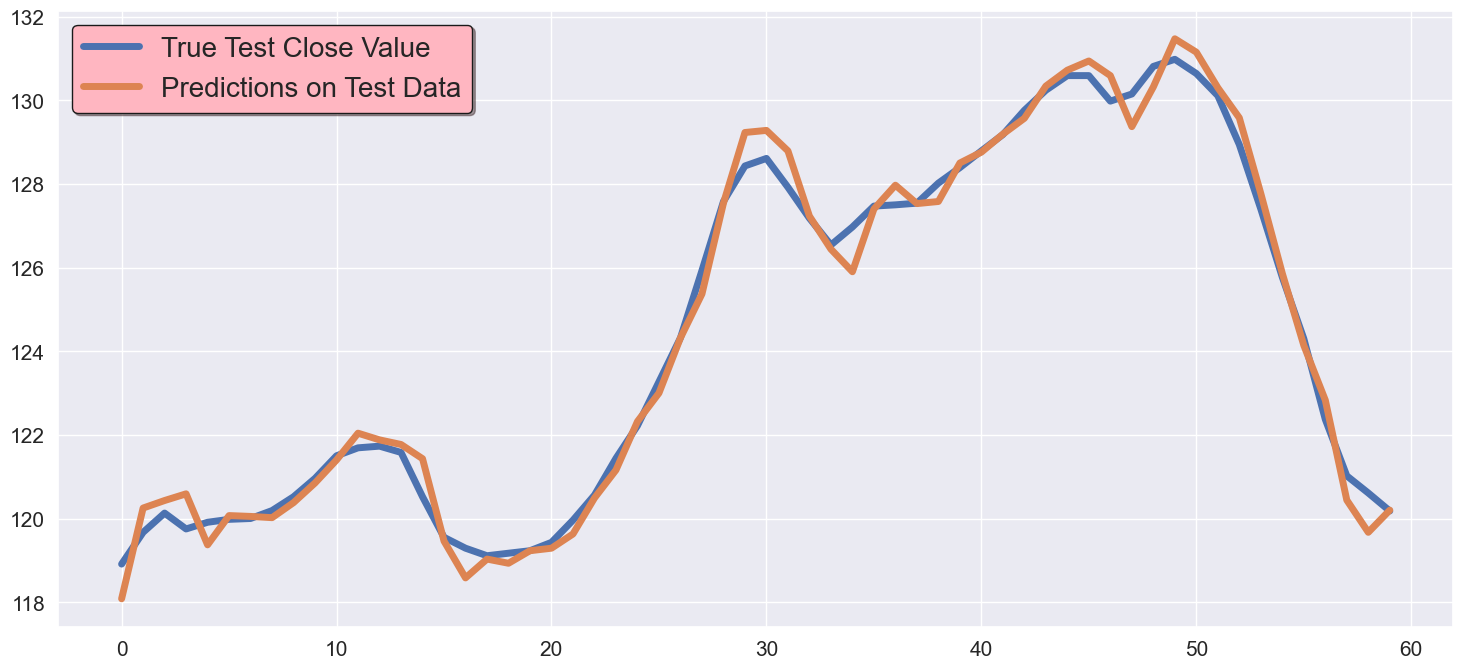

In [40]:
plt.figure(figsize=(18, 8))
plt.grid(True)

# Plot true test close values
plt.plot(range(len(test_data)), test_data, label='True Test Close Value', linewidth=5)

# Plot predictions on test data
plt.plot(range(len(predictions)), predictions, label='Predictions on Test Data', linewidth=5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

plt.show()

In [42]:
model_fit.predict(start=1,end=len(price)+365)

array([111.88792283,  74.35      ,  74.37      , ..., -29.04      ,
       -29.45      , -29.86      ])

In [44]:
## TRainig ON SARIMAX Algoridham
import statsmodels.api as sm
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=sm.tsa.statespace.SARIMAX(history,order=(0, 2, 0),seasonal_order=(1,1,1,3))
    model_fit=model.fit()
    fc=model_fit.forecast(alpha=0.05)
    predictions.append(fc)
    #conf_list.append(conf)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 0.4987726550440761


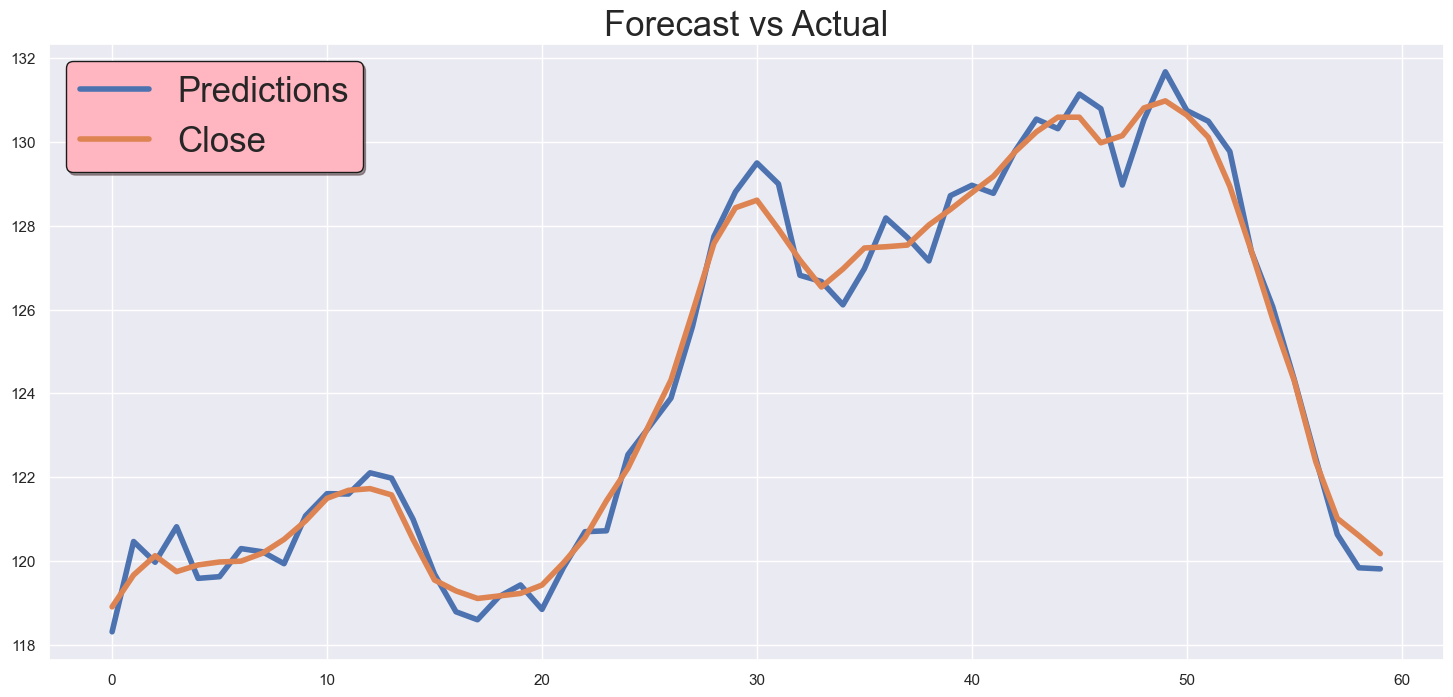

In [45]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [48]:
model_fit.predict(start=1,end=len(price)+365)

array([ 124.31929138,   74.35      ,   89.26632202, ..., -239.74288735,
       -240.90945542, -242.46117495])